In [1]:
import pandas as pd
import os

# Set the path to the folder containing the txt files
folder_path = os.path.join('src', 'data', 'ecb-speeches')

# List all txt files in the folder
txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df_main = pd.DataFrame(columns=['date', 'content'])

# Iterate through the txt files and read their content
for txt_file in txt_files:
    # Extract the date from the file name
    date_str = txt_file.split('_')[0]
    date = pd.to_datetime(date_str, format='%Y-%m-%d')
    
    # Read the content of the file
    with open(os.path.join(folder_path, txt_file), 'r') as file:
        content = file.read()
    
    # Append the date and content to the DataFrame
    df_main = pd.concat([df_main, pd.DataFrame({'date': [date], 'content': [content]})], ignore_index=True)

# Sort the DataFrame by date
df_main = df_main.sort_values(by='date').reset_index(drop=True)


In [2]:
df_main

,date,content
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...
1,1998-09-18,Mr. Duisenberg’s opening statement at the meet...
2,1998-10-12,Mr. Duisenberg's statement to the European Par...
3,1998-10-12,Mr. Duisenberg speaks on changes in European f...
4,1998-10-22,Mr. Duisenberg’s opening statement at the pres...
...,...,...
2270,2022-02-18,012234\n\n56789 6ÿ6ÿÿ69ÿ96ÿÿ...
2271,2022-02-23,Frank Elderson: Towards an immersive superviso...
2272,2022-02-23,
2273,2022-02-23,Frank Elderson: Prudential pathways to Paris\n...


In [3]:
# Set the path to the output CSV file
output_file = os.path.join('src', 'output', 'data.csv')

# Save the DataFrame to a CSV file
df_main.to_csv(output_file, index=False)


In [4]:
# Set the path to the input CSV file
input_file = os.path.join('src', 'output', 'data.csv')

# Read the CSV file into a DataFrame
df_main = pd.read_csv(input_file)

# Display the first 20 rows of the DataFrame
df_main.head(20)

,date,content
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...
1,1998-09-18,Mr. Duisenberg’s opening statement at the meet...
2,1998-10-12,Mr. Duisenberg's statement to the European Par...
3,1998-10-12,Mr. Duisenberg speaks on changes in European f...
4,1998-10-22,Mr. Duisenberg’s opening statement at the pres...
5,1998-11-09,Mr. Duisenberg’s opening statement at the pres...
6,1998-11-26,Mr. Duisenberg looks at the international role...
7,1998-12-03,Mr Duisenberg reports on the current position ...
8,1999-01-08,Mr Duisenberg’s opening statement at the press...
9,1999-01-11,Mr Duisenberg’s opening statement at the press...


In [5]:
text = df_main.iloc[0,1]
text

'Mr. Duisenberg reports on the outcome of the second meeting of the Governing\nCouncil of the European Central Bank Introductory statement by the President of the European\nCentral Bank, Dr. W. Duisenberg, at the press conference held in Frankfurt on 8/7/98.\n\nThe Governing Council first assessed current economic developments in the euro\narea. The general picture is one of continued economic expansion combined with broadly low\ninflation.\nSeveral forecasts made during spring 1998 have even suggested slightly lower\nrates of inflation for 1998-99 compared with expectations in autumn 1997. As far as price\ndevelopments are concerned, inflation as measured by the harmonised consumer price index\n(HICP) is estimated to have risen slightly in April, to 1.4%, but has not increased further in May.\nOutput growth has remained strong in recent quarters, with annual growth rates\nclose to or even exceeding 3%. Economic growth has been driven increasingly by domestic\ndemand rather than net ex

In [6]:
import nltk
nltk.download('punkt')

from transformers import pipeline

[nltk_data] Downloading package punkt to /home/ozodbek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
import transformers

classifier = pipeline(
    "text-classification", model="distilbert-base-uncased-finetuned-sst-2-english"
)
paragraph = df_main.iloc[0,1]

max_len = 512
paragraph

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


'Mr. Duisenberg reports on the outcome of the second meeting of the Governing\nCouncil of the European Central Bank Introductory statement by the President of the European\nCentral Bank, Dr. W. Duisenberg, at the press conference held in Frankfurt on 8/7/98.\n\nThe Governing Council first assessed current economic developments in the euro\narea. The general picture is one of continued economic expansion combined with broadly low\ninflation.\nSeveral forecasts made during spring 1998 have even suggested slightly lower\nrates of inflation for 1998-99 compared with expectations in autumn 1997. As far as price\ndevelopments are concerned, inflation as measured by the harmonised consumer price index\n(HICP) is estimated to have risen slightly in April, to 1.4%, but has not increased further in May.\nOutput growth has remained strong in recent quarters, with annual growth rates\nclose to or even exceeding 3%. Economic growth has been driven increasingly by domestic\ndemand rather than net ex

In [8]:
sentiments = []
for chunk in nltk.sent_tokenize(paragraph):
    if len(chunk) <= max_len:
        sentiment = classifier(chunk)[0]
    else:
        subchunks = [chunk[i:i+max_len] for i in range(0, len(chunk), max_len)]
        sentiment = sum(classifier(subchunk)[0]['score'] for subchunk in subchunks) / len(subchunks)
        sentiment = {'label': None, 'score': sentiment}
    sentiments.append({"label": sentiment["label"], "score": sentiment["score"]})

sentiment_single = pd.DataFrame(sentiments) 



In [9]:
sentiment_single

,label,score
0,POSITIVE,0.982439
1,POSITIVE,0.977299
2,POSITIVE,0.981030
3,NEGATIVE,0.990025
4,NEGATIVE,0.974370
...,...,...
72,POSITIVE,0.953033
73,POSITIVE,0.992332
74,POSITIVE,0.971632
75,POSITIVE,0.927429


In [10]:
sentiments = []

for chunk in nltk.sent_tokenize(paragraph):
    if len(chunk) <= max_len:
        sentiment = classifier(chunk)[0]
    else:
        subchunks = [chunk[i:i+max_len] for i in range(0, len(chunk), max_len)]
        sentiment_scores = [classifier(subchunk)[0] for subchunk in subchunks]

        sentiment_probs = {
            'positive': sum(score['score'] for score in sentiment_scores if score['label'] == 'POSITIVE') / len(sentiment_scores),
            'negative': sum(score['score'] for score in sentiment_scores if score['label'] == 'NEGATIVE') / len(sentiment_scores),
            'neutral': sum(score['score'] for score in sentiment_scores if score['label'] == 'NEUTRAL') / len(sentiment_scores)
        }
        
        sentiments.append(sentiment_probs)

sentiments_df = pd.DataFrame(sentiments)
sentiments_df

,positive,negative,neutral
0,0.929381,0.0,0.0


## functional way

In [11]:
max_chunk_length = 512


In [12]:
import pandas as pd
from functions import calculate_sentiment_distilbert

# Create an empty DataFrame
df = pd.DataFrame()

# Apply the sentiment analysis function to the 'content' column for the first 10 rows
df[['positive', 'negative']] = df_main['content'].head(10).apply(
    lambda x: pd.Series(calculate_sentiment_distilbert(x))
)

# Calculate the neutral sentiment as the remaining probability
df['neutral'] = 1 - df['positive'] - df['negative']

# Print the updated DataFrame
print(df)


   positive  negative  neutral
0  0.935110  0.064890      0.0
1  0.904324  0.095676      0.0
2  0.956236  0.043764      0.0
3  0.906362  0.093638      0.0
4  0.914322  0.085678      0.0
5  0.900807  0.099193      0.0
6  0.946191  0.053809      0.0
7  0.973710  0.026290      0.0
8  0.941357  0.058643      0.0
9  0.961934  0.038066      0.0


In [13]:
# Define the start and end dates of the desired date range
start_date = '2008-09-01'
end_date = '2008-09-31'

# Filter the DataFrame based on the date range
subset_df = df_main[(df_main['date'] >= start_date) & (df_main['date'] <= end_date)]

# Apply the sentiment analysis function to the 'content' column for the subset
subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_distilbert(x)))

# Optional: Calculate the neutral sentiment as the remaining probability
subset_df['neutral'] = 1 - subset_df['positive'] - subset_df['negative']

# Print the updated subset DataFrame
print(subset_df)


           date                                            content  positive  \
544  2008-09-03  Gertrude Tumpel-Gugerell: Start of the ECB/ESC...  0.983223   
545  2008-09-04  Gertrude Tumpel-Gugerell: Moving ahead with th...  0.976558   
546  2008-09-09  Jean-Claude Trichet: Risk and the macro-econom...  0.931020   
547  2008-09-09  European Central Bank: Press conference – intr...  0.903439   
548  2008-09-09  Jürgen Stark: Monetary policy during the finan...  0.945200   
549  2008-09-09  José Manuel González-Páramo: Globalisation, ma...  0.932746   
550  2008-09-10  Jürgen Stark: Economic perspectives and moneta...  0.931714   
551  2008-09-10  Gertrude Tumpel-Gugerell: What is the role of ...  0.976124   
552  2008-09-11  José Manuel González-Páramo: Some lessons from...  0.939504   
553  2008-09-11  Jean Claude-Trichet: Hearing before the Econom...  0.889569   
554  2008-09-11  Gertrude Tumpel-Gugerell: SEPA for cards\nSpee...  0.900189   
555  2008-09-15  Jean-Claude Trichet: Th

/tmp/ipykernel_14585/966536470.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_distilbert(x)))
/tmp/ipykernel_14585/966536470.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_distilbert(x)))
/tmp/ipykernel_14585/966536470.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

# Get started with FinBERT

In [14]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

In [15]:
# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')


In [16]:
from functions import split_text
from functions import calculate_sentiment_finbert

In [17]:
# Apply the sentiment analysis function to the 'content' column for the first N rows

N=2
subset = df_main.head(N)
subset[['positive', 'negative']] = subset['content'].head(2).apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))

# Optional: Calculate the neutral sentiment as the remaining probability
subset['neutral'] = 1 - subset['positive'] - subset['negative']

/tmp/ipykernel_14585/3438613357.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[['positive', 'negative']] = subset['content'].head(2).apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))
/tmp/ipykernel_14585/3438613357.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[['positive', 'negative']] = subset['content'].head(2).apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))
/tmp/ipykernel_14585/3438613357.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [18]:
# Print the updated DataFrame
df.head(2)

,positive,negative,neutral
0,0.935110,0.064890,0.0
1,0.904324,0.095676,0.0


In [19]:
# Define the start and end dates of the desired date range
start_date = '2008-09-01'
end_date = '2008-09-31'

# Filter the DataFrame based on the date range
subset_df = df_main[(df_main['date'] >= start_date) & (df_main['date'] <= end_date)]

# Apply the sentiment analysis function to the 'content' column for the subset
subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))

# Optional: Calculate the neutral sentiment as the remaining probability
subset_df['neutral'] = 1 - subset_df['positive'] - subset_df['negative']

# Print the updated subset DataFrame
subset_df


/tmp/ipykernel_14585/966850476.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))
/tmp/ipykernel_14585/966850476.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))
/tmp/ipykernel_14585/966850476.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,date,content,positive,negative,neutral
544,2008-09-03,Gertrude Tumpel-Gugerell: Start of the ECB/ESC...,0.584601,0.402499,0.012901
545,2008-09-04,Gertrude Tumpel-Gugerell: Moving ahead with th...,0.710431,0.173809,0.115760
546,2008-09-09,Jean-Claude Trichet: Risk and the macro-econom...,0.593253,0.148920,0.257826
547,2008-09-09,European Central Bank: Press conference – intr...,0.262152,0.380591,0.357257
548,2008-09-09,Jürgen Stark: Monetary policy during the finan...,0.663428,0.230403,0.106169
549,2008-09-09,"José Manuel González-Páramo: Globalisation, ma...",0.558848,0.297435,0.143717
550,2008-09-10,Jürgen Stark: Economic perspectives and moneta...,0.405998,0.265484,0.328518
551,2008-09-10,Gertrude Tumpel-Gugerell: What is the role of ...,0.764259,0.216999,0.018742
552,2008-09-11,José Manuel González-Páramo: Some lessons from...,0.547132,0.318116,0.134752
553,2008-09-11,Jean Claude-Trichet: Hearing before the Econom...,0.464297,0.294642,0.241061


# 

In [20]:
# save the data in parquet format
subset_df.to_parquet('src/output/finbert_sentiment_test.parquet')

In [21]:
subset_df = pd.read_parquet('src/output/finbert_sentiment_test.parquet')
subset_df

,date,content,positive,negative,neutral
544,2008-09-03,Gertrude Tumpel-Gugerell: Start of the ECB/ESC...,0.584601,0.402499,0.012901
545,2008-09-04,Gertrude Tumpel-Gugerell: Moving ahead with th...,0.710431,0.173809,0.115760
546,2008-09-09,Jean-Claude Trichet: Risk and the macro-econom...,0.593253,0.148920,0.257826
547,2008-09-09,European Central Bank: Press conference – intr...,0.262152,0.380591,0.357257
548,2008-09-09,Jürgen Stark: Monetary policy during the finan...,0.663428,0.230403,0.106169
549,2008-09-09,"José Manuel González-Páramo: Globalisation, ma...",0.558848,0.297435,0.143717
550,2008-09-10,Jürgen Stark: Economic perspectives and moneta...,0.405998,0.265484,0.328518
551,2008-09-10,Gertrude Tumpel-Gugerell: What is the role of ...,0.764259,0.216999,0.018742
552,2008-09-11,José Manuel González-Páramo: Some lessons from...,0.547132,0.318116,0.134752
553,2008-09-11,Jean Claude-Trichet: Hearing before the Econom...,0.464297,0.294642,0.241061


In [22]:
### sentiment probabilities are different each time the function is run


# Topic modeling


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [24]:
# load the data and convert the content column to list
df_topic = pd.read_parquet('src/output/finbert_sentiment_test.parquet')
subset = df_topic.head(10)
documents = subset['content'].tolist()


In [25]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the documents into a document-term matrix
dtm = vectorizer.fit_transform(documents)

In [26]:
df

,positive,negative,neutral
0,0.935110,0.064890,0.0
1,0.904324,0.095676,0.0
2,0.956236,0.043764,0.0
3,0.906362,0.093638,0.0
4,0.914322,0.085678,0.0
5,0.900807,0.099193,0.0
6,0.946191,0.053809,0.0
7,0.973710,0.026290,0.0
8,0.941357,0.058643,0.0
9,0.961934,0.038066,0.0


In [27]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

data = df_main.head(10)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=5)

# Apply TF-IDF vectorization to the documents
tfidf_matrix = vectorizer.fit_transform(data['content'])

# Apply LSA (Truncated SVD)
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

# Get the feature names (i.e., the terms) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# For each topic, print the top words
for topic_idx, topic in enumerate(lsa_model.components_):
    print(f"Topic {topic_idx + 1}:")
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(", ".join(top_words))
    print()


Topic 1:
council, governing, growth, banknotes, strategy, today, reserve, press, report, january

Topic 2:
role, international, strategy, assets, development, objective, possible, reserve, value, systems

Topic 3:
reserve, systems, assets, credit, operations, securities, contribute, payment, liquidity, framework

Topic 4:
role, international, emi, report, council, procedures, work, strategy, agreement, instruments

Topic 5:
problems, january, target, today, day, confidence, december, changeover, longer, role

Topic 6:
eu, foreign, role, adopted, governing, international, reserve, legal, agreed, official

Topic 7:
changeover, january, systems, term, data, banknotes, prices, 2002, took, point

Topic 8:
world, previous, foreign, degree, confidence, long, international, past, adopted, policies

Topic 9:
official, short, took, inflation, january, decided, international, quarter, unemployment, continued

Topic 10:
value, quarter, indicators, problems, separate, recent, economy, agreement, re

# Data pipeline for other stock data


In [28]:
import pandas as pd
# !pip install yfinance
import yfinance as yf

In [43]:
# download the stock data for apple
stock_aapl = yf.download('AAPL', start='2006-01-01', end='2021-01-01')

# download the stock data for microsoft
stock_msft = yf.download('MSFT', start='2006-01-01', end='2021-01-01')

# download the stock data for google
stock_goog = yf.download('GOOG', start='2006-01-01', end='2021-01-01')

# download the stock data for amazon
stock_amzn = yf.download('AMZN', start='2006-01-01', end='2021-01-01')

# combine all the stock data into one dataframe, keep only adjusted close
stock_data = pd.concat([stock_aapl['Adj Close'], stock_msft['Adj Close'], stock_goog['Adj Close'], stock_amzn['Adj Close']], axis=1) # ,stock_fb['Adj Close'], stock_tsla['Adj Close']"""
stock_data.columns = ['AAPL', 'MSFT', 'GOOG', 'AMZN']  #, 'FB', 'TSLA']

# z-score normalize each of the columns
stock_data = (stock_data - stock_data.mean()) / stock_data.std()


stock_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,GOOG,AMZN
Date,,,,
2006-01-03,-0.895238,-0.674184,-0.924353,-0.766531
2006-01-04,-0.894965,-0.672271,-0.911999,-0.766953
2006-01-05,-0.895697,-0.671976,-0.904594,-0.766442
2006-01-06,-0.893317,-0.673154,-0.886798,-0.766161
2006-01-09,-0.893627,-0.673890,-0.885267,-0.767170
...,...,...,...,...
2020-12-24,4.321082,3.443254,2.846564,3.226148
2020-12-28,4.510960,3.488025,2.938827,3.368307
2020-12-29,4.437744,3.471616,2.895792,3.416908


<Axes: title={'center': 'Stock Prices'}, xlabel='Date'>

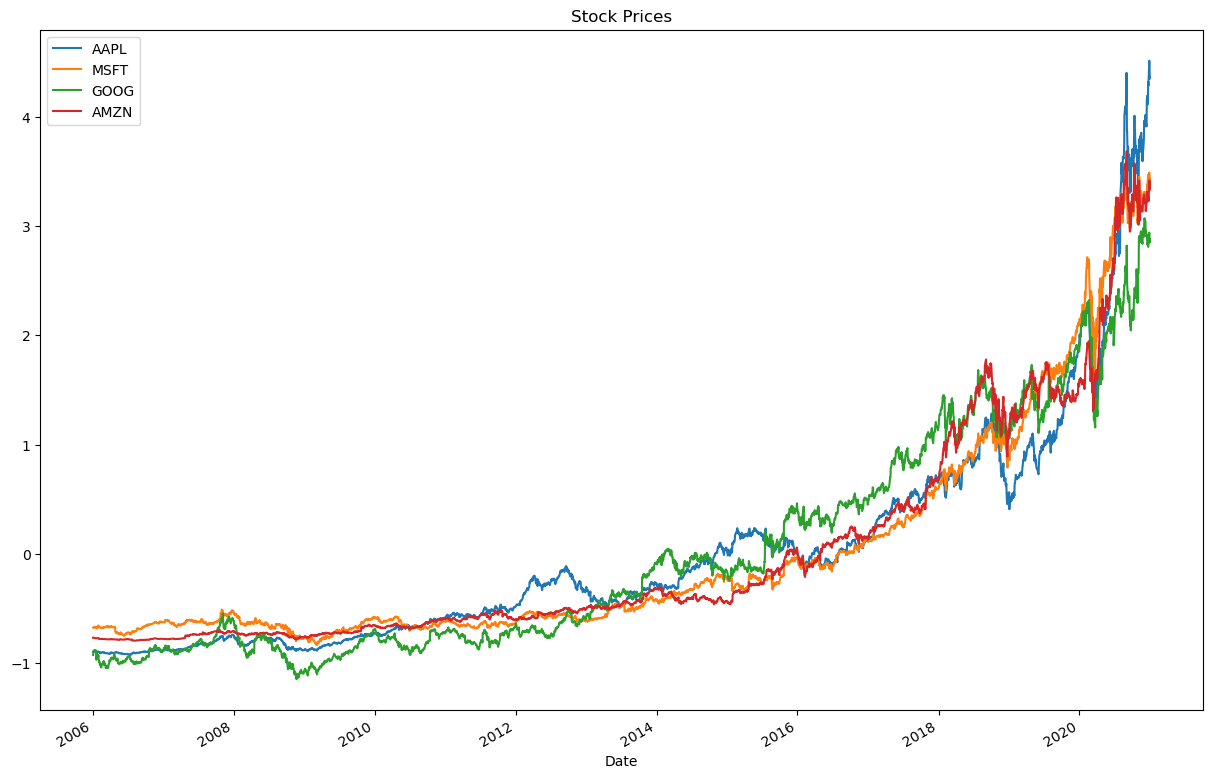

In [44]:
# plot the stock data
stock_data.plot(figsize=(15, 10), title='Stock Prices')


In [31]:
# Define the ticker symbols for the indices
tickers = ['^GSPC', '^GDAXI', '^IXIC']  # SP, DAX, NASDAQ

# Download index data
index_data = yf.download(tickers, start='2006-01-01', end='2021-01-01')

# Print the downloaded data
index_data


[*********************100%***********************]  3 of 3 completed


Adj Close                                    Close  \
                  ^GDAXI        ^GSPC         ^IXIC        ^GDAXI   
Date                                                                
2006-01-02   5449.979980          NaN           NaN   5449.979980   
2006-01-03   5460.680176  1268.800049   2243.739990   5460.680176   
2006-01-04   5523.620117  1273.459961   2263.459961   5523.620117   
2006-01-05   5516.529785  1273.479980   2276.870117   5516.529785   
2006-01-06   5536.319824  1285.449951   2305.620117   5536.319824   
...                  ...          ...           ...           ...   
2020-12-24           NaN  3703.060059  12804.730469           NaN   
2020-12-28  13790.290039  3735.360107  12899.419922  13790.290039   
2020-12-29  13761.379883  3727.040039  12850.219727  13761.379883   
2020-12-30  13718.780273  3732.040039  12870.000000  13718.780273   
2020-12-31           NaN  3756.070068  12888.280273           NaN   

                                               High               \
                  ^GSPC         ^IXIC        ^GDAXI        ^GSPC   
Date                                                               
2006-01-02          NaN           NaN   5451.569824          NaN   
2006-01-03  1268.800049   2243.739990   5496.459961  1270.219971   
2006-01-04  1273.459961   2263.459961   5523.669922  1275.369995   
2006-01-05  1273.479980   2276.870117   5526.410156  1276.910034   
2006-01-06  1285.449951   2305.620117   5537.580078  1286.089966   
...                 ...           ...           ...          ...   
2020-12-24  3703.060059  12804.730469           NaN  3703.820068   
2020-12-28  3735.360107  12899.419922  13818.650391  3740.510010   
2020-12-29  3727.040039  12850.219727  13903.110352  3756.120117   
2020-12-30  3732.040039  12870.000000  13797.089844  3744.629883   
2020-12-31  3756.070068  12888.280273           NaN  3760.199951   

                                   Low                             \
                   ^IXIC        ^GDAXI        ^GSPC         ^IXIC   
Date                                                                
2006-01-02           NaN   5409.279785          NaN           NaN   
2006-01-03   2249.679932   5440.740234  1245.739990   2189.909912   
2006-01-04   2265.280029   5477.600098  1267.739990   2246.070068   
2006-01-05   2277.560059   5502.250000  1270.300049   2264.500000   
2006-01-06   2306.719971   5507.919922  1273.479980   2281.010010   
...                  ...           ...          ...           ...   
2020-12-24  12833.549805           NaN  3689.320068  12767.639648   
2020-12-28  12930.889648  13740.209961  3723.030029  12827.450195   
2020-12-29  12973.330078  13747.080078  3723.310059  12821.959961   
2020-12-30  12924.929688  13717.469727  3730.209961  12857.759766   
2020-12-31  12902.070312           NaN  3726.879883  12821.230469   

                    Open                                  Volume  \
                  ^GDAXI        ^GSPC         ^IXIC       ^GDAXI   
Date                                                               
2006-01-02   5410.240234          NaN           NaN   36148300.0   
2006-01-03   5451.339844  1248.290039   2216.530029  105746000.0   
2006-01-04   5494.459961  1268.800049   2246.959961  108624100.0   
2006-01-05   5521.859863  1273.459961   2264.929932  102413000.0   
2006-01-06   5521.520020  1273.479980   2289.209961   90224400.0   
...                  ...          ...           ...          ...   
2020-12-24           NaN  3694.030029  12791.540039          NaN   
2020-12-28  13779.049805  3723.030029  12914.639648   49250200.0   
2020-12-29  13873.349609  3750.010010  12965.389648   43160200.0   
2020-12-30  13750.990234  3736.189941  12906.509766   28318700.0   
2020-12-31           NaN  3733.270020  12877.089844          NaN   

                                        
                   ^GSPC         ^IXIC  
Date                                    
2006-01-02           NaN           NaN  
2006-01-03 

In [32]:
# create subset of index data where only the adjusted closing price is included
index_data_adj_close = index_data['Adj Close']
index_data_adj_close.head()

,^GDAXI,^GSPC,^IXIC
Date,,,
2006-01-02,5449.979980,NaN,NaN
2006-01-03,5460.680176,1268.800049,2243.739990
2006-01-04,5523.620117,1273.459961,2263.459961
2006-01-05,5516.529785,1273.479980,2276.870117
2006-01-06,5536.319824,1285.449951,2305.620117


In [33]:
# standardize the index data adj close
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scale the columns and keep the date index
index_data_scaled = pd.DataFrame(scaler.fit_transform(index_data_adj_close), index=index_data_adj_close.index, columns=index_data_adj_close.columns)
index_data_scaled.head()

,^GDAXI,^GSPC,^IXIC
Date,,,
2006-01-02,-1.247425,NaN,NaN
2006-01-03,-1.243457,-0.840025,-0.884245
2006-01-04,-1.220116,-0.833331,-0.876285
2006-01-05,-1.222745,-0.833303,-0.870872
2006-01-06,-1.215406,-0.816110,-0.859268


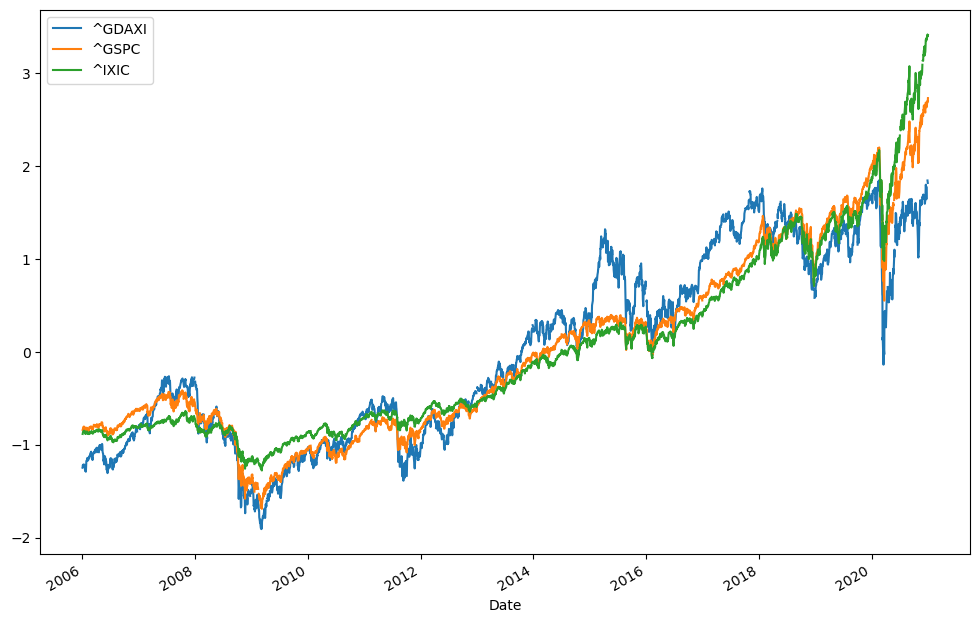

In [34]:
import matplotlib.pyplot as plt
# plot the index data scaled
index_data_scaled.plot(figsize=(12, 8))
plt.show()



In [35]:
from fredapi import Fred

# Replace 'YOUR_API_KEY' with your FRED API key
# You can obtain your API key by signing up on the FRED website (https://fred.stlouisfed.org/)

"""api_key = '70cf91cb88406a16dfa52aa0a8f88b51'
fred = Fred(api_key=api_key)
"""
import os

os.environ['FRED_API_KEY'] = '70cf91cb88406a16dfa52aa0a8f88b51'


# Access the API key from the environment variable
api_key = os.environ['FRED_API_KEY']

# Create the FRED API object with the API key
fred = Fred(api_key=api_key)

# Specify the series IDs for the economic indicators
unemployment_series_id = 'UNRATE'  # Unemployment rate
gdp_series_id = 'GDP'  # Real GDP (quarterly data)
inflation_series_id = 'CPIAUCSL'  # Consumer Price Index for All Urban Consumers (CPI-U)
interest_rate_series_id = 'FEDFUNDS'  # Effective Federal Funds Rate
money_supply_series_id = 'M2'  # M2 Money Stock

# Download the data for the specified time range
start_date = '2006-01-01'
end_date = '2021-01-01'

unemployment_data = fred.get_series(unemployment_series_id, start_date, end_date)
gdp_data = fred.get_series(gdp_series_id, start_date, end_date)
inflation_data = fred.get_series(inflation_series_id, start_date, end_date)
interest_rate_data = fred.get_series(interest_rate_series_id, start_date, end_date)
money_supply_data = fred.get_series(money_supply_series_id, start_date, end_date)

# Combine the data into a single DataFrame
economic_data = pd.concat([unemployment_data, gdp_data, inflation_data, interest_rate_data, money_supply_data], axis=1)
economic_data.columns = ['unemployment', 'gdp', 'inflation', 'interest_rate', 'money_supply']



In [36]:
# display the first 5 rows of the data
economic_data


,unemployment,gdp,inflation,interest_rate,money_supply
2006-01-01,4.7,13599.16,199.30,4.29,NaN
2006-01-02,NaN,NaN,NaN,NaN,6696.8
2006-01-09,NaN,NaN,NaN,NaN,6714.5
2006-01-16,NaN,NaN,NaN,NaN,6726.9
2006-01-23,NaN,NaN,NaN,NaN,6737.0
...,...,...,...,...,...
2020-12-07,NaN,NaN,NaN,NaN,19089.7
2020-12-14,NaN,NaN,NaN,NaN,19151.6
2020-12-21,NaN,NaN,NaN,NaN,19048.7
2020-12-28,NaN,NaN,NaN,NaN,18938.0


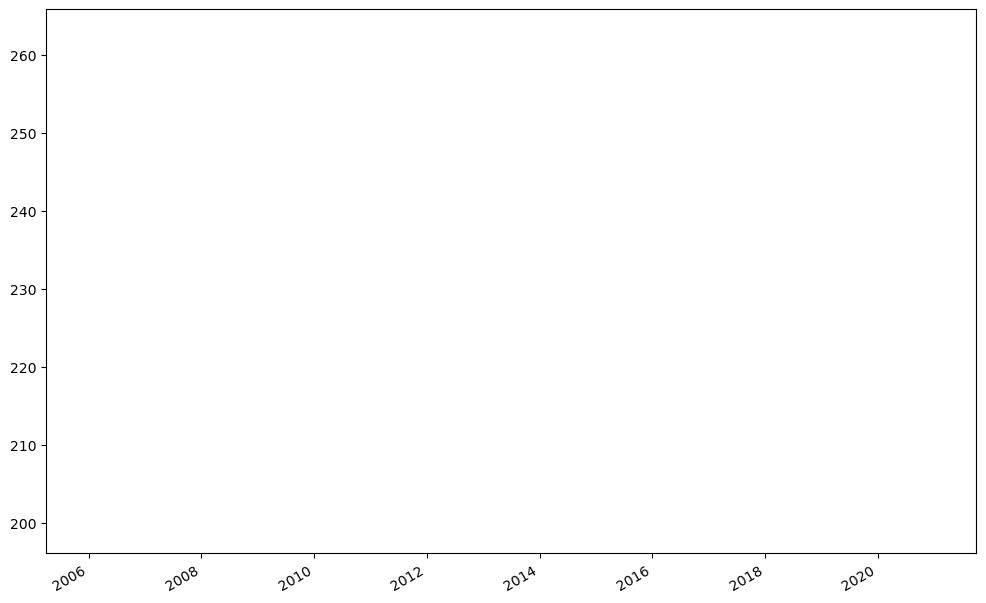

In [37]:
# plot the inflation column of the economic data
economic_data['inflation'].plot(figsize=(12, 8))
plt.show()


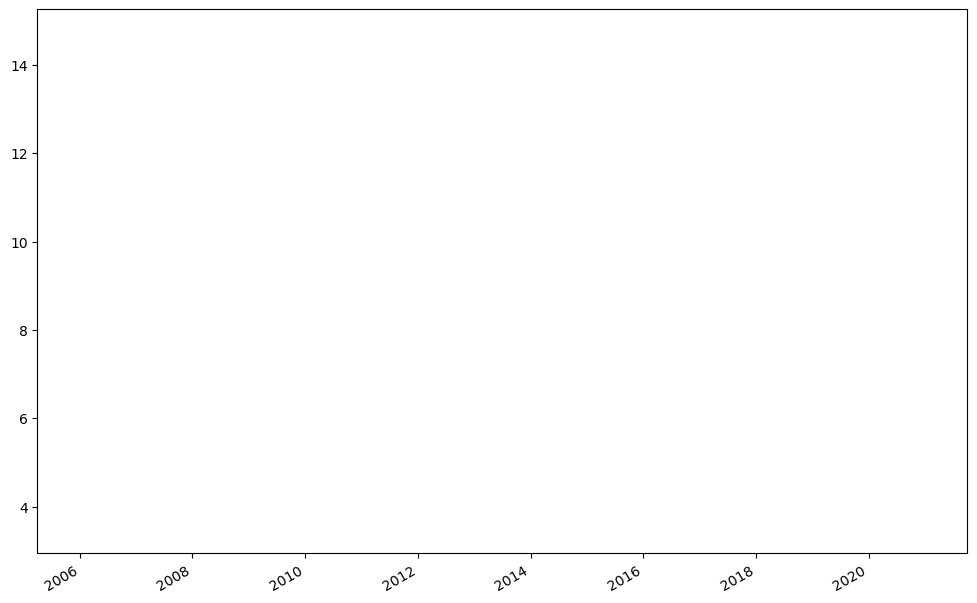

In [38]:
# plot the unemployment column of the economic data
economic_data['unemployment'].plot(figsize=(12, 8))
plt.show()


In [39]:
# combine all the data with same time index into one dataframe
all_data = pd.concat([index_data_scaled, economic_data, stock_data], axis=1)
all_data

,^GDAXI,^GSPC,^IXIC,unemployment,gdp,inflation,interest_rate,money_supply,AAPL,MSFT,GOOG,AMZN,FB,TSLA
2006-01-02,-1.247425,NaN,NaN,NaN,NaN,NaN,NaN,6696.8,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,-1.243457,-0.840025,-0.884245,NaN,NaN,NaN,NaN,NaN,-0.895238,-0.674184,-0.924353,-0.766531,NaN,NaN
2006-01-04,-1.220116,-0.833331,-0.876285,NaN,NaN,NaN,NaN,NaN,-0.894965,-0.672271,-0.911999,-0.766953,NaN,NaN
2006-01-05,-1.222745,-0.833303,-0.870872,NaN,NaN,NaN,NaN,NaN,-0.895697,-0.671976,-0.904594,-0.766442,NaN,NaN
2006-01-06,-1.215406,-0.816110,-0.859268,NaN,NaN,NaN,NaN,NaN,-0.893317,-0.673154,-0.886798,-0.766161,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,NaN,NaN,NaN,3.5,NaN,259.248,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,4.4,NaN,258.124,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,NaN,NaN,NaN,8.4,NaN,259.411,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-01,NaN,NaN,NaN,6.7,NaN,260.813,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# count the number of missing values in each column
all_data.isnull().sum()


^GDAXI            142
^GSPC             166
^IXIC             166
unemployment     3761
gdp              3881
inflation        3761
interest_rate    3761
money_supply     3159
AAPL              166
MSFT              166
GOOG              166
AMZN              166
FB               3942
TSLA             1295
dtype: int64

In [41]:
all_data.to_parquet('src/output/all_data.parquet')